<a href="https://colab.research.google.com/github/nehayan987-byte/DE-project/blob/main/garments_worker_productivity_20_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [ ]:
df=pd.read_csv('/content/garments_worker_productivity - garments_worker_productivity.csv')

In [ ]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
df.shape

(1197, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df['wip'].fillna(df['wip'].median(),inplace = True)

In [ ]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
df['date']= pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
df['quarter']= df['quarter'].astype('category')
df['department']= df['department'].astype('category')
df['day']=df['day'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   category      
 2   department             1197 non-null   category      
 3   day                    1197 non-null   category      
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
# Univariate Analysis

def univariate_analysis(df,column):
  print("measures of central tendency", column)
  print("mean",df[column].mean())
  print("median",df[column].median())
  print("mode",df[column].mode())
  print("measures of dispersion", column)
  print("standard deviation", df[column].std())
  print("variance", df[column].var())
  print("range", df[column].max()-df[column].min())
univariate_analysis(df,'team')




measures of central tendency team
mean 6.426900584795321
median 6.0
mode 0    2
1    8
Name: team, dtype: int64
measures of dispersion team
standard deviation 3.463963284992193
variance 11.999041639773907
range 11


percentage distribution quarter
quarter
Quarter1    30.075188
Quarter2    27.986633
Quarter4    20.718463
Quarter3    17.543860
Quarter5     3.675856
Name: proportion, dtype: float64
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


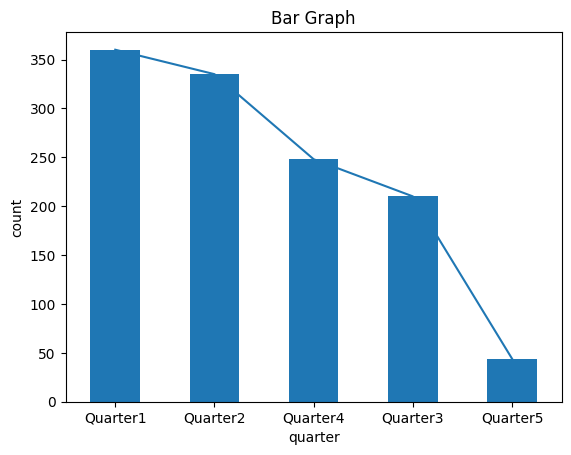

In [ ]:
def univariate_bargraph(df,column):
  print('percentage distribution', column)
  print(df[column].value_counts(normalize = True)* 100)
  print(df[column].value_counts())
  df[column].value_counts().plot (kind = 'bar')
  df[column].value_counts().plot (kind = 'line')
  plt.title('Bar Graph')
  plt.xlabel(column)
  plt.ylabel('count')
  plt.show()

univariate_bargraph(df,'quarter')




In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')
Index(['quarter', 'department', 'day'], dtype='object')


In [ ]:
# Correlation Analysis (Bivariate Analysis)

numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.023647   
targeted_productivity  0.030274               1.000000 -0.069489  0.045428   
smv                   -0.110011              -0.069489  1.000000  0.028526   
wip                   -0.023647               0.045428  0.028526  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.050755   
incentive             -0.007674               0.032768  0.032629  0.024301   
idle_time              0.003796              -0.056181  0.056863 -0.023596   
idle_men               0.026974              -0.053818  0.105901 -0.043241   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.052790   
no_of_workers         -0.075113              -0.084288  0.912176  0.060086   
actual_productivity   -0.148753               0.421594 -0.122089  0.083545   

                       over_time  incentive  idle_time  idle_me

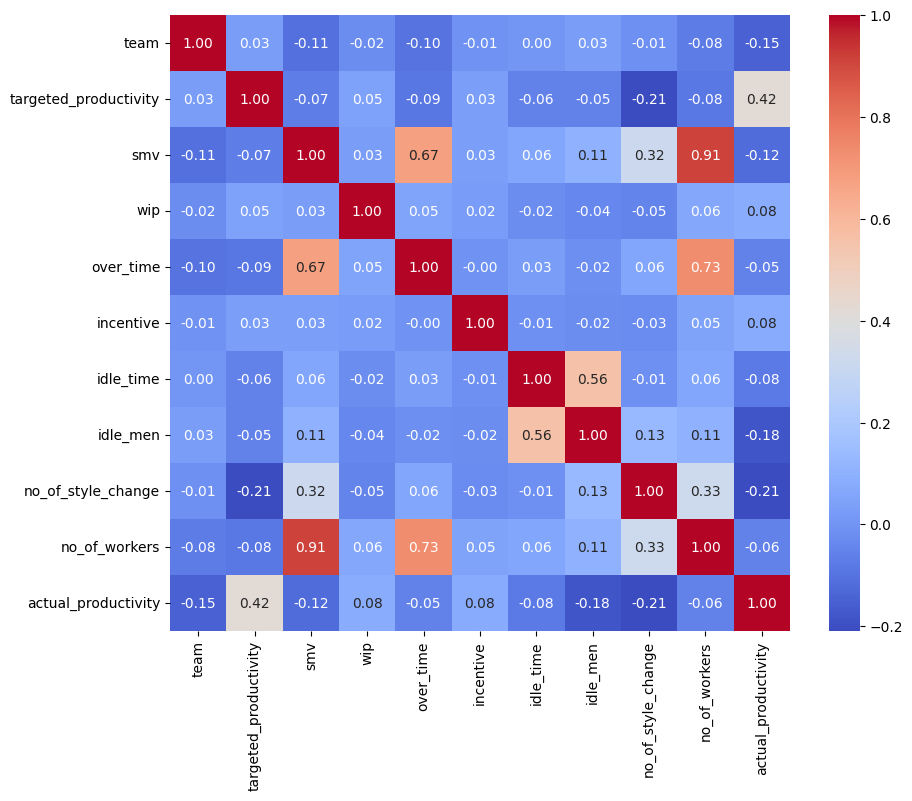

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt = '0.2f', cmap='coolwarm')
plt.show()

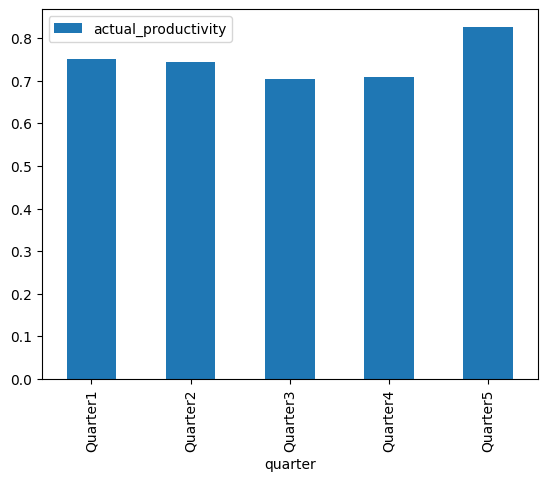

          actual_productivity
quarter                      
Quarter1             0.751560
Quarter2             0.743710
Quarter3             0.704759
Quarter4             0.709067
Quarter5             0.826177


In [ ]:
bar_graph =df.pivot_table(index='quarter',values='actual_productivity',aggfunc= 'mean')
bar_graph.plot(kind='bar')
plt.show()
print(bar_graph)


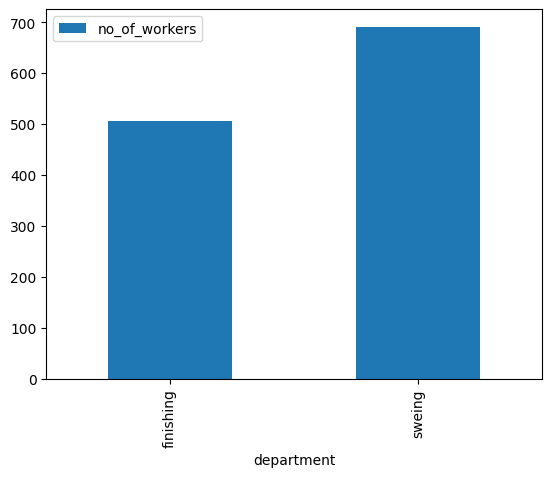

            no_of_workers
department               
finishing             506
sweing                691


In [ ]:
bar_graph2 =df.pivot_table(index='department',values='no_of_workers',aggfunc= 'count')
bar_graph2.plot(kind='bar')
plt.show()
print(bar_graph2)


In [ ]:
# Linear Regression
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)


Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')
Index(['quarter', 'department', 'day'], dtype='object')


In [ ]:
# feature engineering

data = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(data)


           date  team  targeted_productivity    smv     wip  over_time  \
0    2015-01-01     8                   0.80  26.16  1108.0       7080   
1    2015-01-01     1                   0.75   3.94  1039.0        960   
2    2015-01-01    11                   0.80  11.41   968.0       3660   
3    2015-01-01    12                   0.80  11.41   968.0       3660   
4    2015-01-01     6                   0.80  25.90  1170.0       1920   
...         ...   ...                    ...    ...     ...        ...   
1192 2015-03-11    10                   0.75   2.90  1039.0        960   
1193 2015-03-11     8                   0.70   3.90  1039.0        960   
1194 2015-03-11     7                   0.65   3.90  1039.0        960   
1195 2015-03-11     9                   0.75   2.90  1039.0       1800   
1196 2015-03-11     6                   0.70   2.90  1039.0        720   

      incentive  idle_time  idle_men  no_of_style_change  ...  \
0            98        0.0         0          

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   team                   1197 non-null   int64         
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   int64         
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  quarter_Quarter2       1197 non-null   bool          
 13  qua

In [ ]:
data = data.astype (int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   date                   1197 non-null   int64
 1   team                   1197 non-null   int64
 2   targeted_productivity  1197 non-null   int64
 3   smv                    1197 non-null   int64
 4   wip                    1197 non-null   int64
 5   over_time              1197 non-null   int64
 6   incentive              1197 non-null   int64
 7   idle_time              1197 non-null   int64
 8   idle_men               1197 non-null   int64
 9   no_of_style_change     1197 non-null   int64
 10  no_of_workers          1197 non-null   int64
 11  actual_productivity    1197 non-null   int64
 12  quarter_Quarter2       1197 non-null   int64
 13  quarter_Quarter3       1197 non-null   int64
 14  quarter_Quarter4       1197 non-null   int64
 15  quarter_Quarter5       1197 non-null  

In [ ]:
# fitting the model

x = data.drop(['team'], axis= 1)
y = data['team']
print(x.shape)
print(y.shape)

(1197, 21)
(1197,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 20)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(837, 21)
(360, 21)
(837,)
(360,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model)


LinearRegression()


In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
print (y_pred)

[6.48114588 5.89131884 6.3023484  6.83941804 6.25617258 6.63824705
 6.53496327 6.32921684 5.95937359 5.676696   6.00994342 6.58597727
 6.67366283 6.3276647  6.51138446 7.51590629 5.98815496 5.77064901
 5.88846598 5.98589723 6.25131644 6.14116017 6.4225432  6.13590471
 6.46298471 6.30495976 6.25481096 6.7279006  6.2410109  6.71237008
 6.52344561 6.31458831 5.84999487 6.26401767 5.31934546 6.47486452
 6.28230489 7.15537374 6.54951232 6.15699861 6.0448002  6.40122102
 6.10621306 6.33818793 6.68249997 6.91683157 6.0491713  6.97310495
 5.84405564 6.61173602 6.03506457 6.71219454 6.20474165 6.71880043
 6.46624686 6.24102286 6.36748958 6.50437472 6.53366039 5.58180686
 6.057933   5.77169435 6.60430139 6.18480244 6.47801849 6.79010334
 6.37435444 6.23585348 6.45751475 6.20180918 6.73427729 6.0213369
 6.24202043 6.73819267 6.45502272 6.30616976 6.62081163 5.74101598
 6.14698377 6.09950326 6.89201301 3.95111252 6.52837688 6.21989889
 6.48516776 6.12701791 6.20121454 6.33818793 6.38323448 6.11119

In [ ]:
print ("mean_absolute_error",round(mean_absolute_error(y_test,y_pred),2))
print ("mean_squared_error", round(mean_squared_error(y_test,y_pred),2))
print ("r2_score",round(r2_score(y_test,y_pred),2))

mean_absolute_error 3.15
mean_squared_error 12.92
r2_score -0.02


In [ ]:
# Logistic Regression
# 1. feature engineering
# 2. data pre procssing
# 3. creaation of dummy variables
# 4. fitting the model
# 5. model improvement (optional)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   category      
 2   department             1197 non-null   category      
 3   day                    1197 non-null   category      
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
def outliers(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  upper_range=q3+1.5*iqr
  lower_range=q1-1.5*iqr
  outliers = data[(data>upper_range)|(data<lower_range)]
  return outliers
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for i in numeric_columns:
  result = outliers(df[i])
  print(i,len(result))

team 0
targeted_productivity 79
smv 0
wip 358
over_time 1
incentive 11
idle_time 18
idle_men 18
no_of_style_change 147
no_of_workers 0
actual_productivity 54


In [ ]:
from scipy import stats
z_score = np.abs(stats.zscore(result))
threshold = 2.5
outliers = np.where (z_score > threshold)
print (outliers)
print (z_score)

(array([], dtype=int64),)
60      1.248584
125     0.827113
146     1.358996
147     1.757751
169     1.037848
215     1.421411
237     1.365836
255     1.361137
256     0.887323
257     0.320207
258     1.392830
298     0.391133
317     1.701715
336     1.366154
392     0.754554
414     1.360018
415     1.021268
436     0.811879
455     1.362095
496     0.373522
497     1.069508
541     0.329250
560     0.399548
577     0.106092
578     0.507580
579     1.026508
689     1.368389
690     1.368389
691     0.731011
748     1.368389
765     1.641491
783     0.327719
784     0.434622
801     0.823124
802     1.106374
822     0.076485
840     0.773970
841     0.115553
842     1.146592
843     1.283351
863     1.336508
882     0.220842
883     0.410388
920     0.690008
921     0.832512
963     0.734362
984     0.734362
1024    1.155488
1045    0.269958
1046    0.093994
1067    0.881616
1086    0.953714
1127    0.734362
1149    0.943829
Name: actual_productivity, dtype: float64


In [ ]:
outliers = np.unique(outliers)
cleaned_data = df.drop(df.index[outliers])
df = cleaned_data
print (df.head())


        date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday     1                   0.75   
2 2015-01-01  Quarter1     sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1     sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1     sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94  1039.0        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [ ]:
df.shape

(1197, 15)

In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
numeric_columns = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[numeric_columns]= scaler.fit_transform(df[numeric_columns])
print (df.head())


        date   quarter department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1     sweing  Thursday     8               0.719137   
1 2015-01-01  Quarter1  finishing  Thursday     1               0.208151   
2 2015-01-01  Quarter1     sweing  Thursday    11               0.719137   
3 2015-01-01  Quarter1     sweing  Thursday    12               0.719137   
4 2015-01-01  Quarter1     sweing  Thursday     6               0.719137   

        smv       wip  over_time  incentive  idle_time  idle_men  \
0  1.014552 -0.013197       7080         98  -0.057473         0   
1 -1.016778 -0.062587        960          0  -0.057473         0   
2 -0.333878 -0.113407       3660         50  -0.057473         0   
3 -0.333878 -0.113407       3660         50  -0.057473         0   
4  0.990783  0.031181       1920         50  -0.057473         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0       1.099229             1.178994  
1             

In [ ]:
# fitting the model
x = data.drop(['actual_productivity'], axis = 1)
y = data['actual_productivity']
x.columns
print (x.columns)
print(x.shape)
print(y.shape)

Index(['date', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_sweing',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')
(1197, 21)
(1197,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 20)
print (x_test.shape)
print (y_test.shape)
print(y_train.shape)

(360, 21)
(360,)
(837,)


In [ ]:
# add a constant in independant variable
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
x_train.head()
x_test.head()

,const,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
700,1.0,1423526400000000000,12,0,15,900,4080,50,0,0,...,1,0,0,0,1,0,0,0,1,0
359,1.0,1421798400000000000,10,0,22,1206,10080,75,0,0,...,0,1,0,0,1,0,0,0,0,1
666,1.0,1423353600000000000,6,0,18,670,3960,34,0,0,...,1,0,0,0,1,0,1,0,0,0
337,1.0,1421712000000000000,5,0,4,1039,1440,0,0,0,...,0,1,0,0,0,0,0,0,1,0
543,1.0,1422748800000000000,2,0,22,1396,6900,113,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
x_train = x_train.astype({col: 'int' for col in x_train.select_dtypes(include=['bool']).columns})
print (x_train.dtypes)
print (y_train.dtypes)


const                    float64
date                       int64
team                       int64
targeted_productivity      int64
smv                        int64
wip                        int64
over_time                  int64
incentive                  int64
idle_time                  int64
idle_men                   int64
no_of_style_change         int64
no_of_workers              int64
quarter_Quarter2           int64
quarter_Quarter3           int64
quarter_Quarter4           int64
quarter_Quarter5           int64
department_sweing          int64
day_Saturday               int64
day_Sunday                 int64
day_Thursday               int64
day_Tuesday                int64
day_Wednesday              int64
dtype: object
int64


In [ ]:
x_train = x_train.apply(pd.to_numeric, errors = 'coerce')
y_train = pd.to_numeric(y_train, errors = 'coerce')
print(x_train.dtypes)
print(y_train.dtypes)

const                    float64
date                       int64
team                       int64
targeted_productivity      int64
smv                        int64
wip                        int64
over_time                  int64
incentive                  int64
idle_time                  int64
idle_men                   int64
no_of_style_change         int64
no_of_workers              int64
quarter_Quarter2           int64
quarter_Quarter3           int64
quarter_Quarter4           int64
quarter_Quarter5           int64
department_sweing          int64
day_Saturday               int64
day_Sunday                 int64
day_Thursday               int64
day_Tuesday                int64
day_Wednesday              int64
dtype: object
int64


In [ ]:
x_train.isnull().sum()

const                    0
date                     0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_sweing        0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

In [ ]:
y_train.isnull().sum()

0

In [ ]:
x_train = x_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [ ]:
model = sm.Logit(y_train, x_train)
print(model)

In [ ]:
lg=model.fit(disp=False)
print(lg.summary())

LinAlgError: Singular matrix

In [ ]:
df=pd.read_csv('/content/garments_worker_productivity - garments_worker_productivity.csv')

In [ ]:
#feature engg or feature reduction
#feature testing
#model evaluation

In [ ]:
df.drop(columns=['date'],inplace=True)

In [ ]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df['over_time']= df['over_time']/60
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,118.0,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,16.0,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,32.0,50,0.0,0,0,56.0,0.800382


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 131.0+ 

In [ ]:
df=pd.get_dummies(df,columns=categorical_columns, drop_first=True )

In [ ]:
#training and testing of data
x=df.drop(['actual_productivity'],axis=1)
y=df['actual_productivity']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(837, 20)
(360, 20)
(837,)
(360,)


In [ ]:
model=DecisionTreeRegressor()


In [ ]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
print(x_train.dtypes)

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
department_sweing           bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
dtype: object


In [ ]:
print(y_train.dtypes)

float64


In [ ]:
x_train.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_sweing', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [ ]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(x_train,y_train)

0.21865080707205087

In [ ]:
#making a decision trees
#supervised data
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
c=DecisionTreeRegressor()
parameters={"max_depth":np.arange(3,10,1),"max_leaf_nodes":[50,75,100,250,300],"min_samples_split":[10,20,30,40,50,60]}
gride_object= GridSearchCV(c,parameters,cv=5,verbose=1)
gride_object=gride_object.fit(x_train,y_train)
a= gride_object.best_estimator_
print(a)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeRegressor(max_depth=7, max_leaf_nodes=100, min_samples_split=50)


In [ ]:
#making a decision trees
#supervised data
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import numpy as np
from sklearn.tree import DecisionTreeRegressor
c=DecisionTreeRegressor()
parameters={"max_depth":np.arange(3,10,1),"max_leaf_nodes":[50,75,100,250,300],"min_samples_split":[10,20,30,40,50,60]}
gride_object= GridSearchCV(c,parameters,cv=5,verbose=1)
gride_object=gride_object.fit(x_train,y_train)
a= gride_object.best_estimator_ # Corrected attribute name
print(a)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeRegressor(max_depth=6, max_leaf_nodes=250, min_samples_split=10)


In [ ]:
a.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=250, min_samples_split=10)

In [ ]:
regressor_y_pred=a.predict(x_test)
print(regressor_y_pred)

[0.7944836  0.73349858 0.7944836  0.61999491 0.7944836  0.7944836
 0.5462087  0.7944836  0.64416136 0.79536765 0.7944836  0.79040907
 0.7944836  0.51354846 0.7944836  0.7944836  0.7944836  0.5462087
 0.7944836  0.64416136 0.5462087  0.5462087  0.70766189 0.79536765
 0.7944836  0.64416136 0.64416136 0.79040907 0.7944836  0.5462087
 0.64416136 0.5462087  0.7944836  0.7944836  0.70766189 0.7944836
 0.5462087  0.7944836  0.7944836  0.79536765 0.64416136 0.7944836
 0.7944836  0.51354846 0.61999491 0.70766189 0.7944836  0.64416136
 0.79536765 0.70766189 0.64416136 0.7944836  0.79536765 0.7944836
 0.7944836  0.73349858 0.7944836  0.70766189 0.7944836  0.7944836
 0.64416136 0.7944836  0.7944836  0.5462087  0.82961384 0.79040907
 0.7944836  0.7944836  0.7944836  0.79040907 0.7944836  0.7944836
 0.5462087  0.7944836  0.7944836  0.61999491 0.7944836  0.7944836
 0.64416136 0.79536765 0.7944836  0.7944836  0.82961384 0.70766189
 0.7944836  0.79536765 0.79040907 0.61999491 0.64416136 0.70766189
 0.7

In [ ]:
regressor_score=a.score(x_test,y_test)
regressor_score_r2=r2_score(y_test,regressor_y_pred)
regressor_mean_eroor=mean_squared_error(y_test,regressor_y_pred)
regressor_mean_absolute_error=mean_absolute_error(y_test,regressor_y_pred)
print(round(regressor_score,2))
print(round(regressor_score_r2,2))
print(round(regressor_mean_eroor,2))
print(round(regressor_mean_absolute_error,2))


0.34
0.34
0.02
0.11


In [ ]:
#randomize search cv
c=DecisionTreeRegressor()
parameters={"max_depth":np.arange(3,10,1),"max_leaf_nodes":[50,75,100,250,300],"min_samples_split":[10,20,30,40,50,60]}
gride_object= RandomizedSearchCV(c,parameters,cv=5,verbose=1)
gride_object=gride_object.fit(x_train,y_train)
b= gride_object.best_estimator_
print(b)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeRegressor(max_depth=7, max_leaf_nodes=300, min_samples_split=40)


In [ ]:
b.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=300, min_samples_split=40)

In [ ]:
regression_y_pred=b.predict(x_test)
print(regression_y_pred)

[0.79067736 0.64836522 0.79067736 0.64836522 0.79067736 0.79067736
 0.64836522 0.79067736 0.64836522 0.74964704 0.79067736 0.64836522
 0.79067736 0.79067736 0.79067736 0.79067736 0.79067736 0.64836522
 0.74964704 0.64836522 0.64836522 0.64836522 0.64836522 0.79067736
 0.79067736 0.64836522 0.64836522 0.64836522 0.79067736 0.64836522
 0.64836522 0.64836522 0.79067736 0.79067736 0.64836522 0.79067736
 0.64836522 0.79067736 0.79067736 0.79067736 0.64836522 0.79067736
 0.79067736 0.79067736 0.64836522 0.64836522 0.74964704 0.64836522
 0.79067736 0.64836522 0.64836522 0.79067736 0.79067736 0.79067736
 0.79067736 0.64836522 0.79067736 0.64836522 0.79067736 0.79067736
 0.64836522 0.79067736 0.79067736 0.64836522 0.79067736 0.64836522
 0.79067736 0.79067736 0.79067736 0.64836522 0.79067736 0.79067736
 0.64836522 0.79067736 0.79067736 0.64836522 0.79067736 0.79067736
 0.64836522 0.79067736 0.79067736 0.79067736 0.79067736 0.64836522
 0.79067736 0.79067736 0.64836522 0.64836522 0.64836522 0.6483

In [ ]:
regressor_score=b.score(x_test,y_test)
regressor_score_r2=r2_score(y_test,regressor_y_pred)
regressor_mean_eroor=mean_squared_error(y_test,regressor_y_pred)
regressor_mean_absolute_error=mean_absolute_error(y_test,regressor_y_pred)
print(round(regressor_score,2))
print(round(regressor_score_r2,2))
print(round(regressor_mean_eroor,2))
print(round(regressor_mean_absolute_error,2))

0.19
0.34
0.02
0.11


In [ ]:
print(np.arange(3,10,1))

[3 4 5 6 7 8 9]


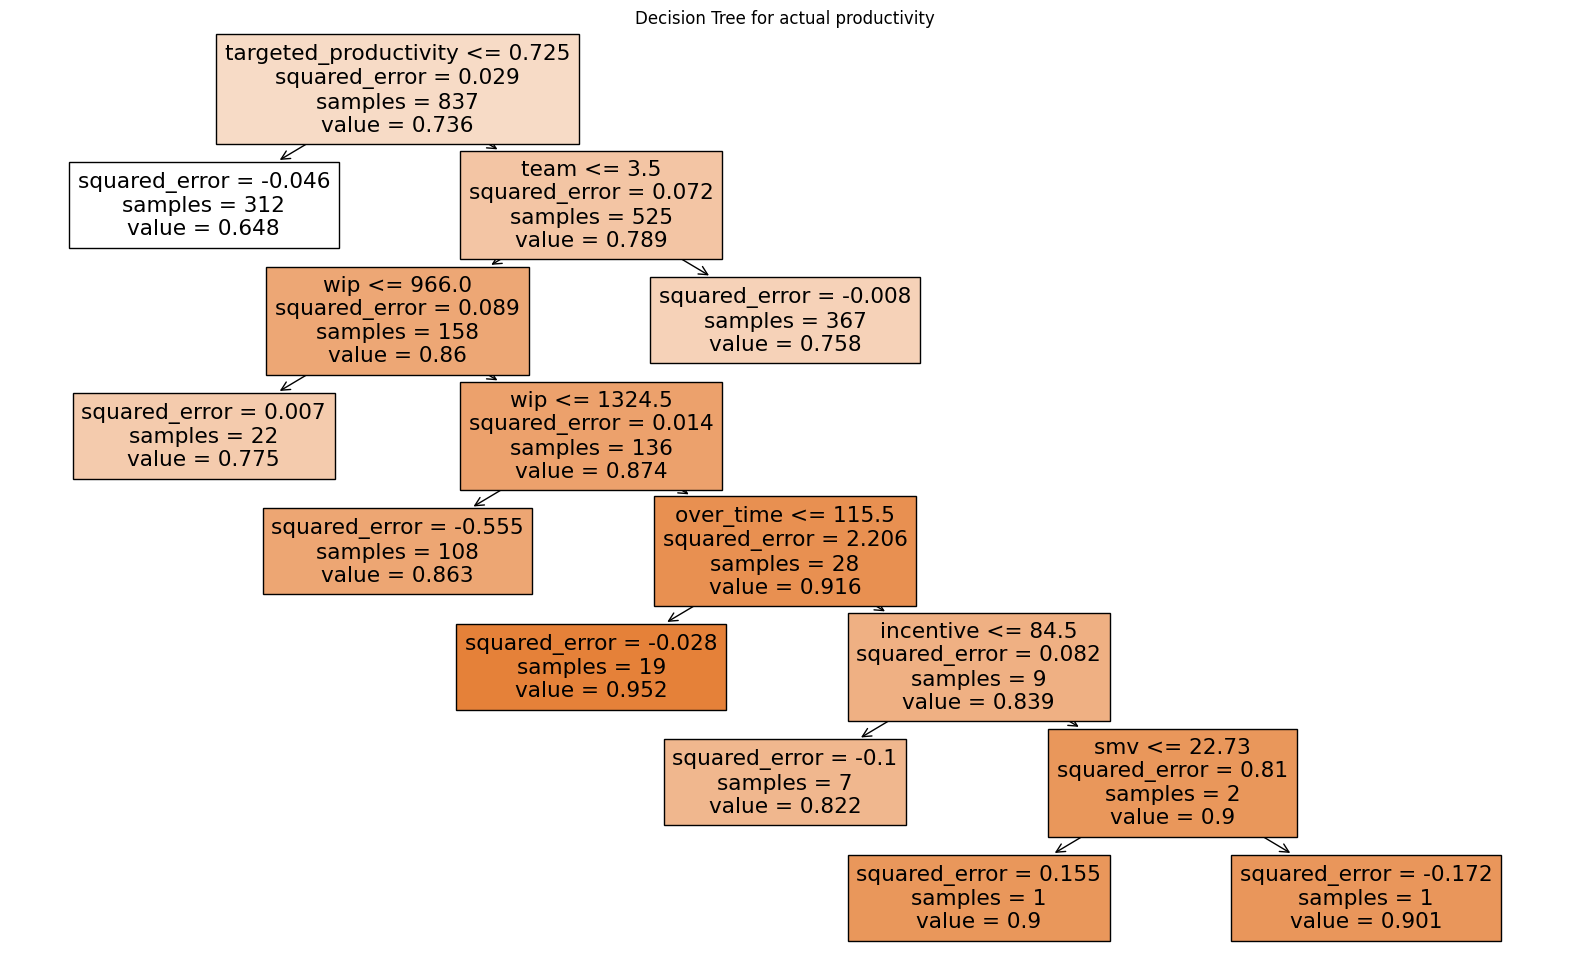

In [ ]:
plt.figure(figsize=(20,12))
tree.plot_tree(model, feature_names=x.columns, filled=True, class_names=[str(x) for x in df['actual_productivity'].unique()])
plt.title('Decision Tree for actual productivity')
plt.show()